# ***Get the best prediction for Liver Patients***

In [21]:
# Importing important Libraries
import pandas as pd
import numpy as np

# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

# Importing for feature visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
list_col= ["Age", "Gender","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase"
, "Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens", "Albumin","Albumin_and_Globulin_Ratio","Liver_Disease"]
for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90] 
GENDER :['Female' 'Male'] 
TOTAL_BILIRUBIN :[ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ] 
DIRECT_BILIRUBIN :[ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1.   3.   1.9
  1.2  7.8  0.6  1.1  3.2  1.8  8.8  1.6  4.5  2.8  4.   2.7  2.4  1

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Disease                 0
dtype: int64

In [5]:
df["Albumin_and_Globulin_Ratio"] = df["Albumin_and_Globulin_Ratio"].fillna(df["Albumin_and_Globulin_Ratio"].mean())
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Disease                 0
dtype: int64

In [6]:
df.Liver_Disease.value_counts()

1    416
2    167
Name: Liver_Disease, dtype: int64

<AxesSubplot:xlabel='Liver_Disease', ylabel='count'>

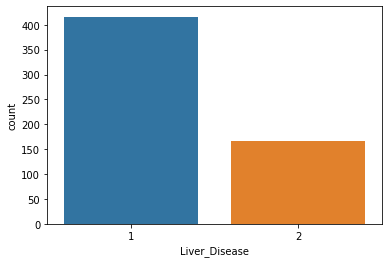

In [13]:
sns.countplot(data=df,x='Liver_Disease',label='Count')

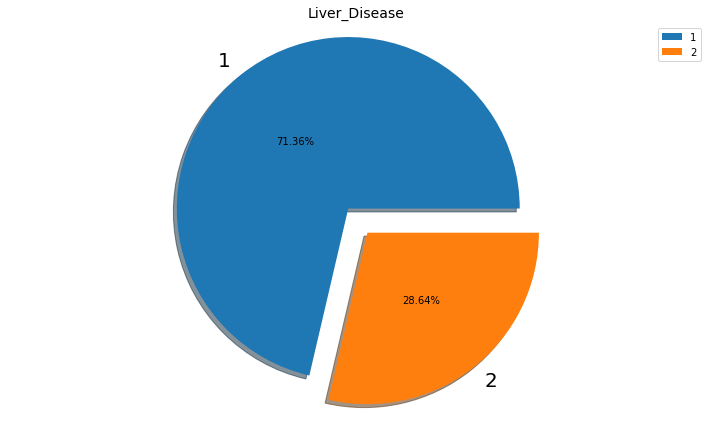

In [7]:
def pieChartPlotter(dataset, columnName):
    """
    Creates pie chart of the column given as parameter in the dataset
    """
    values = dataset[columnName].value_counts()
    labels = dataset[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,explode=[0.06]*dataset[columnName].unique())
    plt.legend(patches, labels, loc="best")
    plt.title(columnName, fontsize=14)
    plt.setp(texts, fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

pieChartPlotter(df,'Liver_Disease')

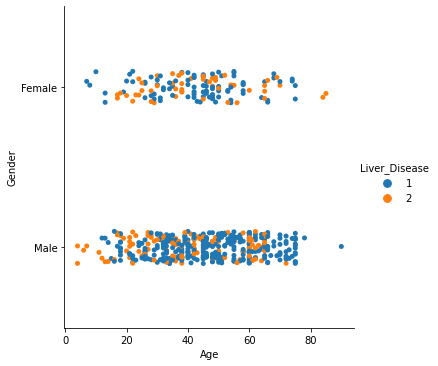

In [9]:
sns.catplot(x="Age", y="Gender", hue="Liver_Disease", data=df)

Text(0.5, 0.98, 'Disease by Gender and Age')

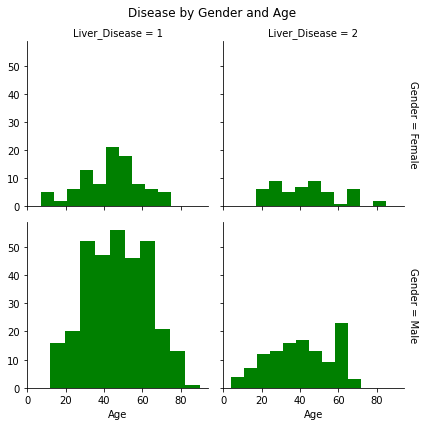

In [12]:
# Plotting Age vs Gender
g = sns.FacetGrid(df, col="Liver_Disease", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="green")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

In [13]:
# Dummy variables for gender column
pd.get_dummies(df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [14]:
df = pd.concat([df,pd.get_dummies(df['Gender'], prefix = 'Gender')], axis=1)

<AxesSubplot:>

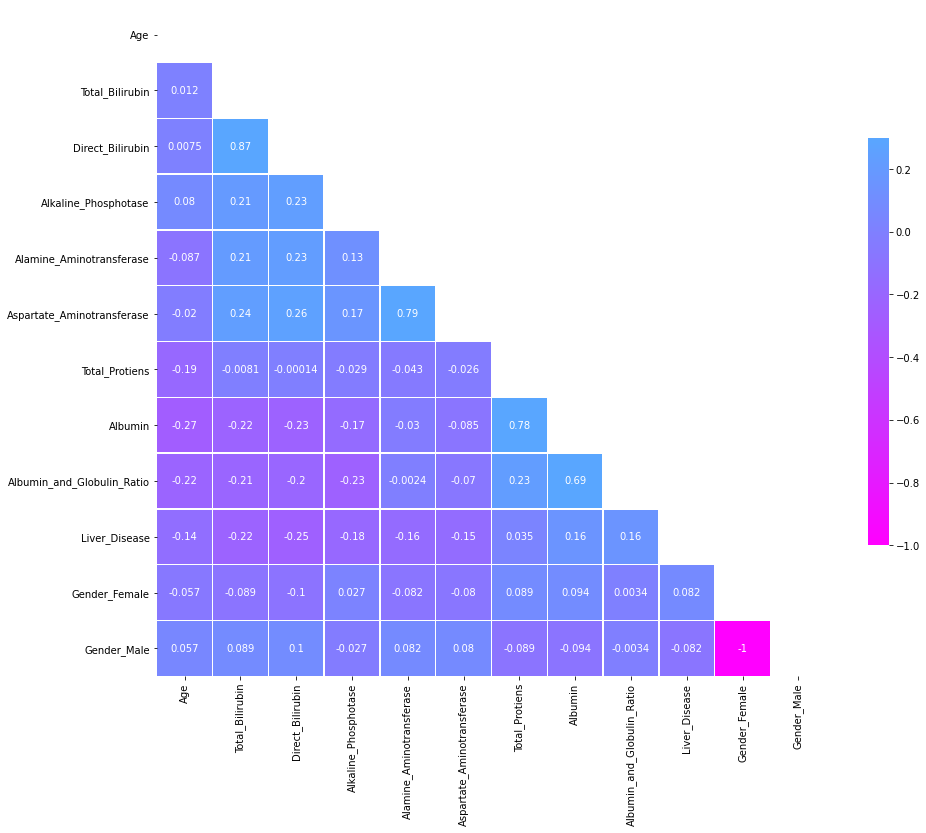

In [15]:
# Compute the correlation matrix
corr = df.corr()
# Set Up Mask To Hide Upper Triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='cool_r', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# Evaluating Models

In [19]:
from sklearn.model_selection import train_test_split
x = df.drop(['Liver_Disease','Gender'], axis = 1)
y = df['Liver_Disease']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 43)

In [30]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'AdaBoostClassifier': GradientBoostingClassifier(random_state=20),
 'GradientBoostingClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=0, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=Non

In [31]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.7142857142857143
KNeighborsClassifier 0.7657142857142857
DecisionTreeClassifier 0.7028571428571428
RandomForestClassifier 0.7371428571428571
AdaBoostClassifier 0.7371428571428571
GradientBoostingClassifier 0.68
[19:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.7142857142857143


Text(0.5, 1.0, 'Plotting the Model Accuracies')

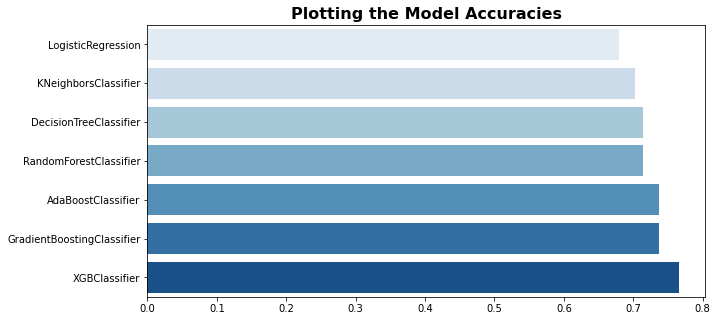

In [33]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = predicted, y = key, palette='Blues', order=predicted.sort())
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")